In [9]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))

from evaluation.evaluation_harness import OnlineEvaluator, include_coldstart, include_all, score_time_spent, score_constant
from pprint import pprint
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
evaluator = OnlineEvaluator(include_all, score_constant)
all_metrics = []
def run_eval(model_name, model_save_path):
    evaluator.reset(model_name, model_save_path)
    evaluator.plot_top_N_hit_percentage_percentiles(10)
    evaluator.compute_top_N_hit_percentage(10)
    evaluator.plot_top_N_hit_percentage_percentiles(50)
    evaluator.compute_top_N_hit_percentage(50)
    evaluator.plot_user_rank_roc_curve()
    evaluator.compute_user_rank_auc_roc()
    # evaluator.save_metrics('test_online_evaluator', overwrite=True)
    pprint(evaluator.metrics)
    all_metrics.append({'model_name': model_name, 'model_save_path': model_save_path, **evaluator.metrics})
    print()

common_neighbors evaluation_test_common_neighbors
{'top_10_hit_percentage': 0.6111111111111112,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'top_50_hit_percentage': 0.5121951219512195,
 'top_50_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_rank_auc_roc': 0.5738095238095238,
 'user_rank_auc_roc_variance': 0.008396325635517364,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}

common_neighbors evaluation_test_common_neighbors_constant_scoring
{'top_10_hit_percentage': 0.3888888888888889,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'top_50_hit_percentage': 0.36363636363636365,
 'top_50_hit_percentage_user_percentiles_figure': <Figure size 640x480 with 1 Axes>,
 'user_rank_auc_roc': 0.7633928571428572,
 'user_rank_auc_roc_variance': 0.016200994477461317,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}

common_neighbors evaluation_test_common_neighb

c:\Users\akash\Desktop\School\CS 3892\ml-projects-project\evaluation\..\evaluation\evaluation_harness.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axis = plt.subplots()


Not enough samples to get percentile figure.
Not enough samples to get percentile figure.
{'top_10_hit_percentage': 0.75,
 'top_10_hit_percentage_user_percentiles_figure': None,
 'top_50_hit_percentage': 0.75,
 'top_50_hit_percentage_user_percentiles_figure': None,
 'user_rank_auc_roc': 0.4166666666666665,
 'user_rank_auc_roc_variance': 0.18055555555555558,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}

neural_collborative_filtering_cf evaluation_test_cf_embed_all_except_tags_genres
Not enough samples to get percentile figure.
Not enough samples to get percentile figure.
{'top_10_hit_percentage': 0.1111111111111111,
 'top_10_hit_percentage_user_percentiles_figure': None,
 'top_50_hit_percentage': 0.2,
 'top_50_hit_percentage_user_percentiles_figure': None,
 'user_rank_auc_roc': 0.375,
 'user_rank_auc_roc_variance': 0.14732142857142858,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}

neural_collborative_filtering_cf evaluation_test_cf_low_weight_decay_increase

c:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\akash\Desktop\School\CS 3892\ml-projects-project\evaluation\compare_auc_delong_xu.py:71: RuntimeWarning: Degrees of freedom <= 0 for slice
  sx = np.cov(v01)
c:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Not enough samples for AUC ROC
{'top_10_hit_percentage': 0.0,
 'top_10_hit_percentage_user_percentiles_figure': None,
 'top_50_hit_percentage': 0.0,
 'top_50_hit_percentage_user_percentiles_figure': None,
 'user_rank_auc_roc': None,
 'user_rank_auc_roc_variance': None,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}

neural_collborative_filtering_mlp evaluation_test_mlp_embed_all_except_tags_genres
Not enough samples to get percentile figure.
Not enough samples to get percentile figure.
Not enough samples for AUC ROC
{'top_10_hit_percentage': 0.0,
 'top_10_hit_percentage_user_percentiles_figure': None,
 'top_50_hit_percentage': 0.0,
 'top_50_hit_percentage_user_percentiles_figure': None,
 'user_rank_auc_roc': None,
 'user_rank_auc_roc_variance': None,
 'user_rank_roc_figure': <Figure size 640x480 with 1 Axes>}

neural_collborative_filtering_mlp test_mlp_model
{'top_10_hit_percentage': 0.3333333333333333,
 'top_10_hit_percentage_user_percentiles_figure': <Figure size 640x480

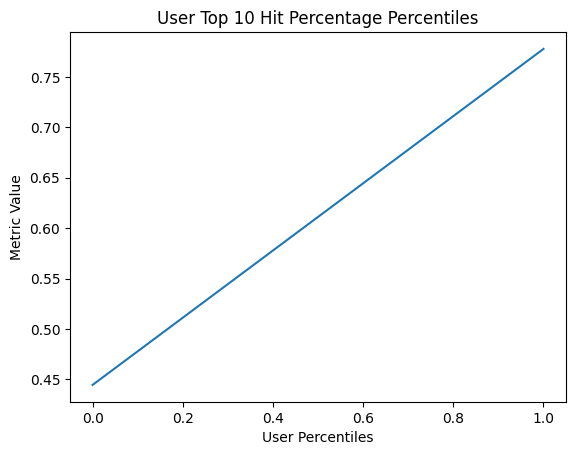

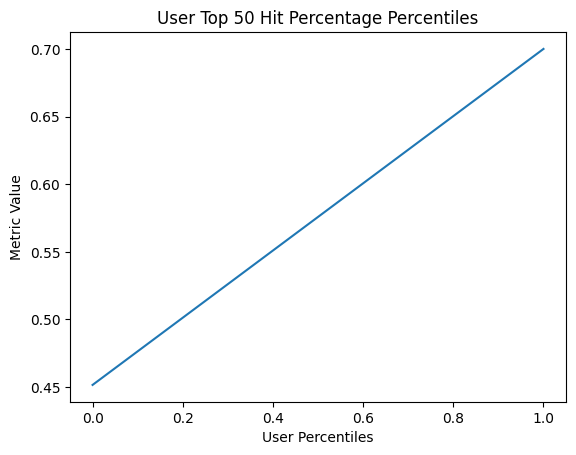

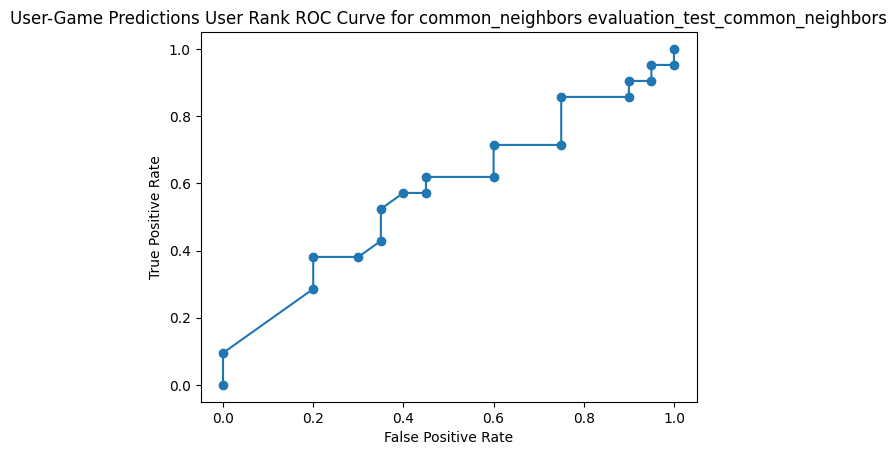

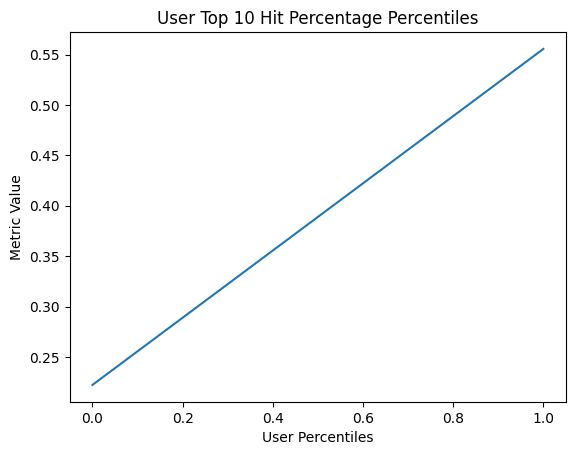

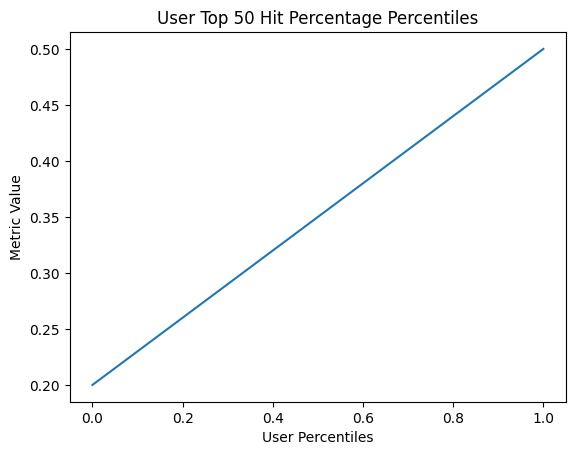

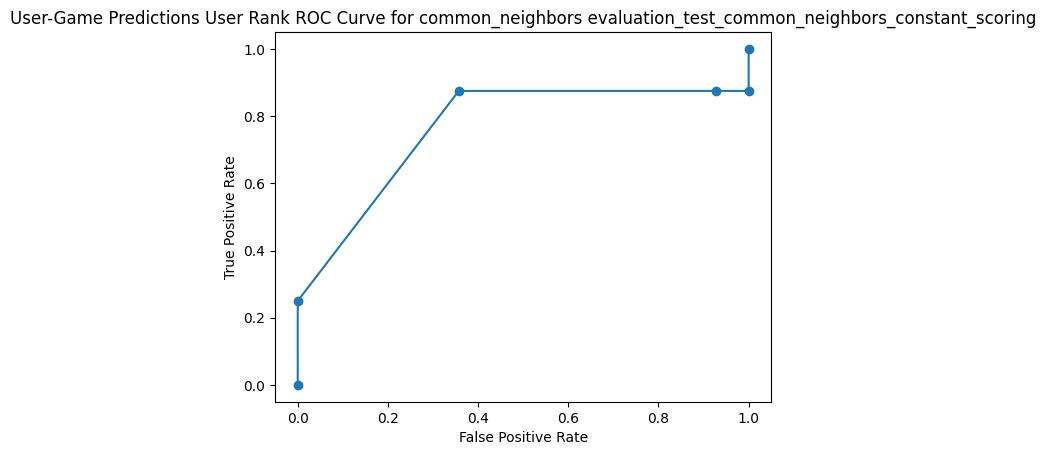

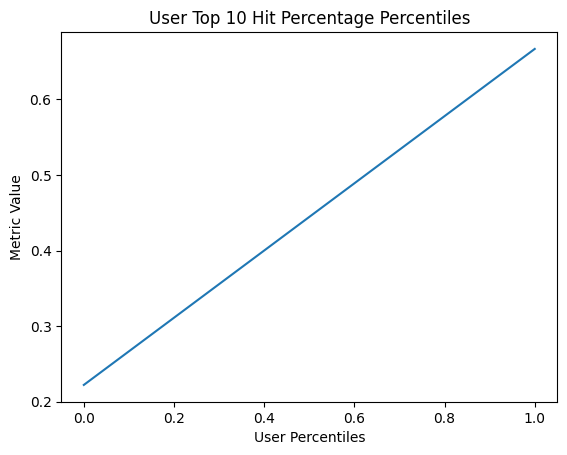

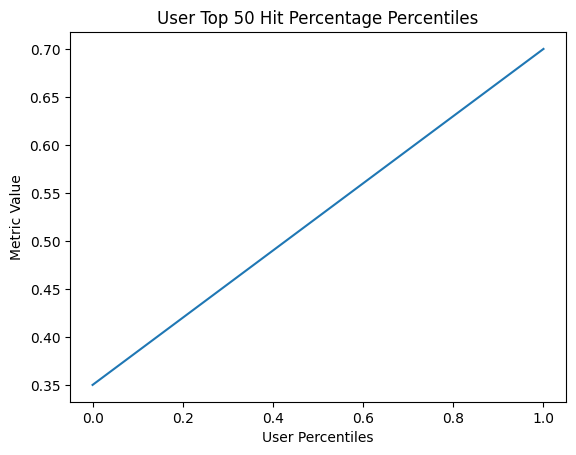

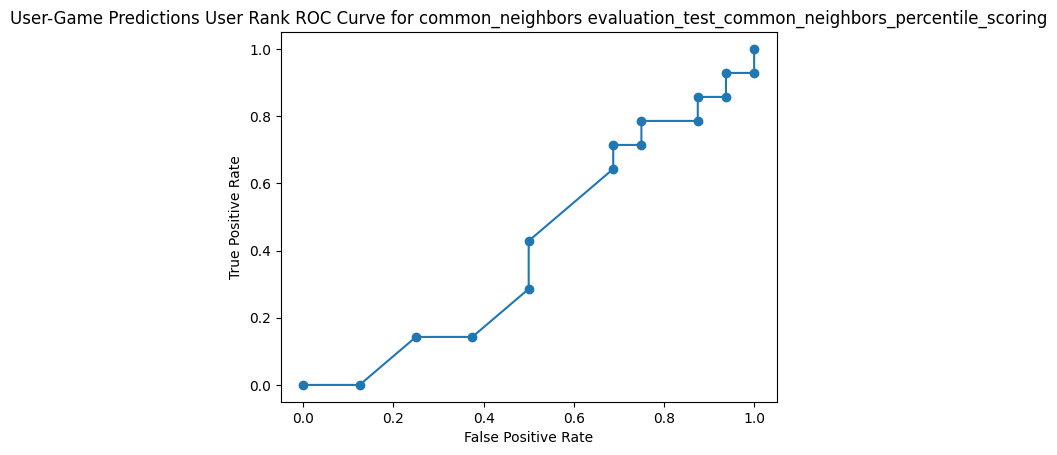

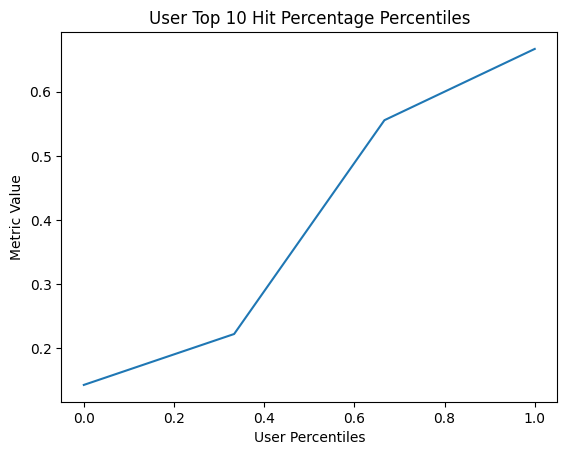

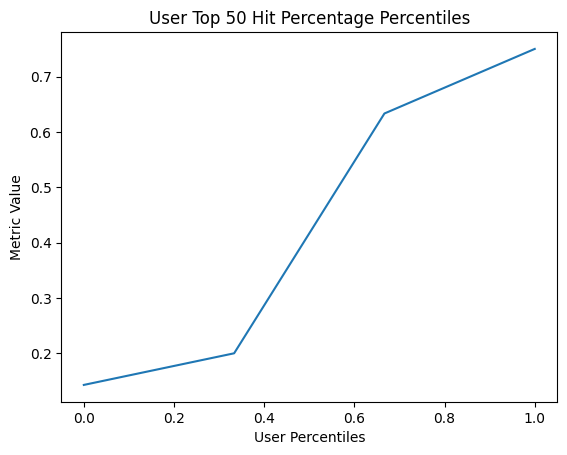

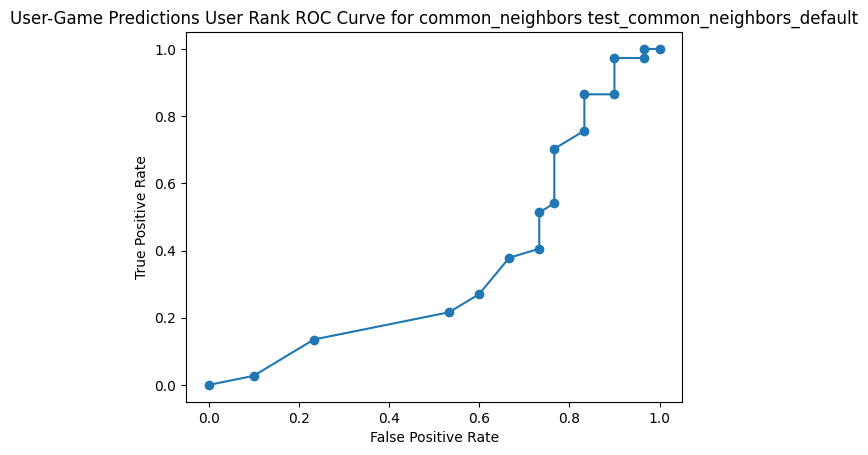

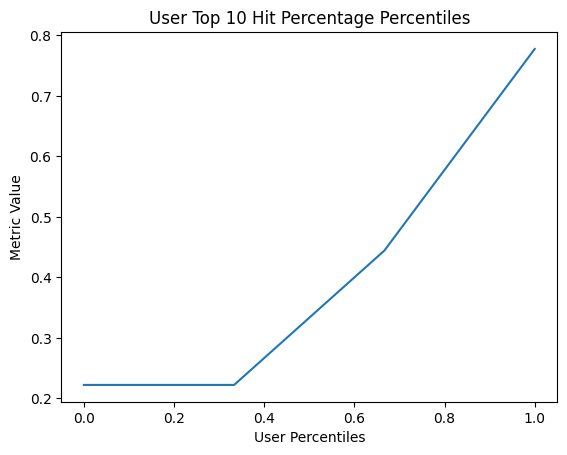

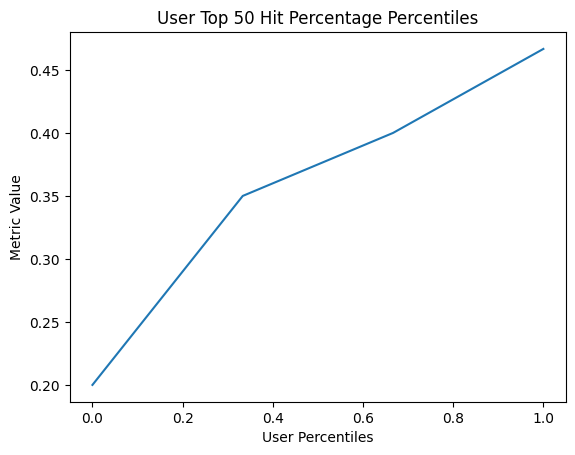

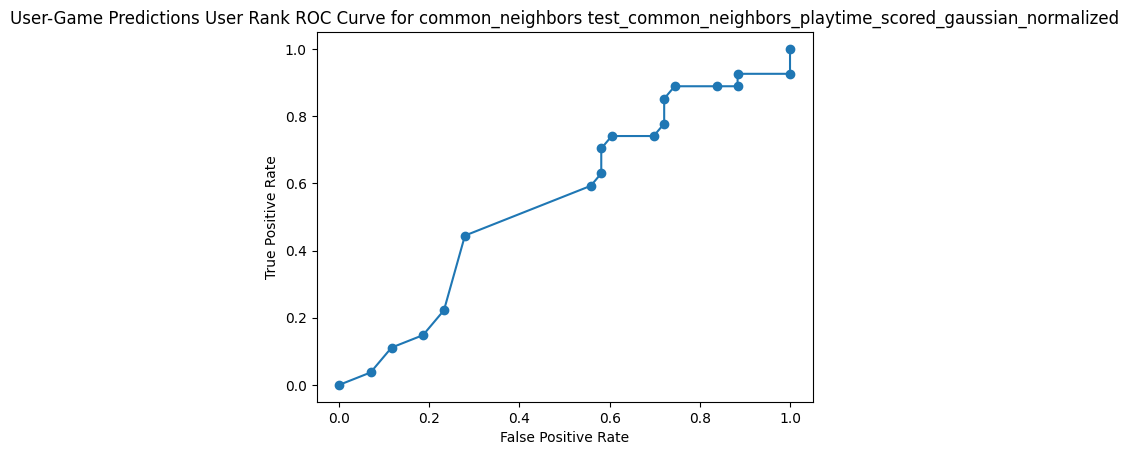

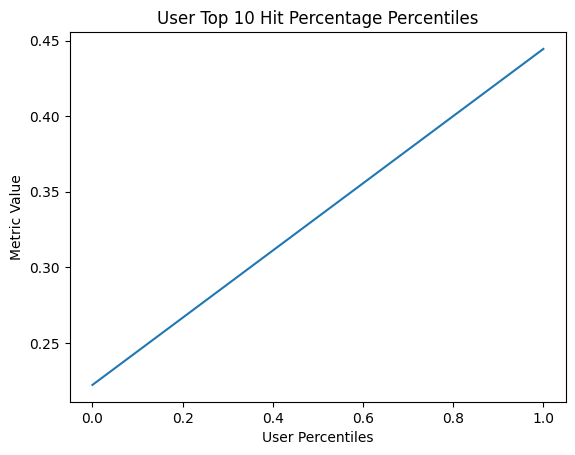

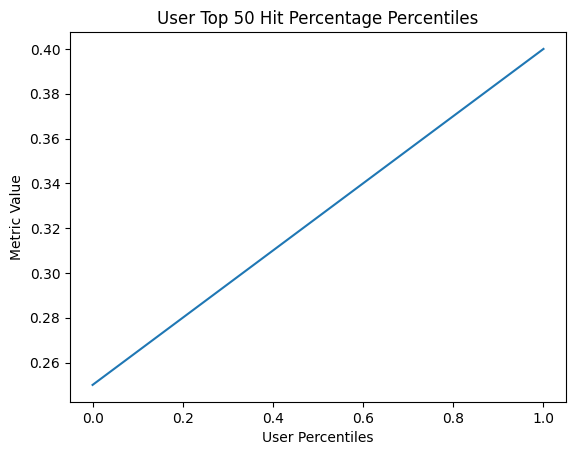

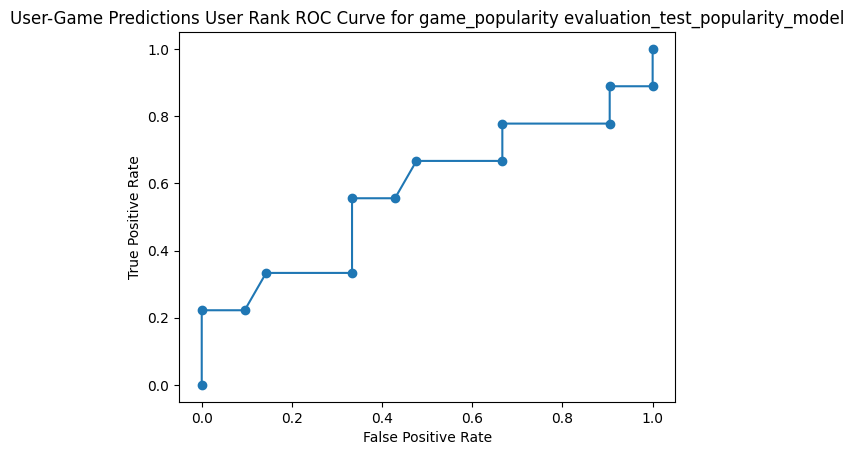

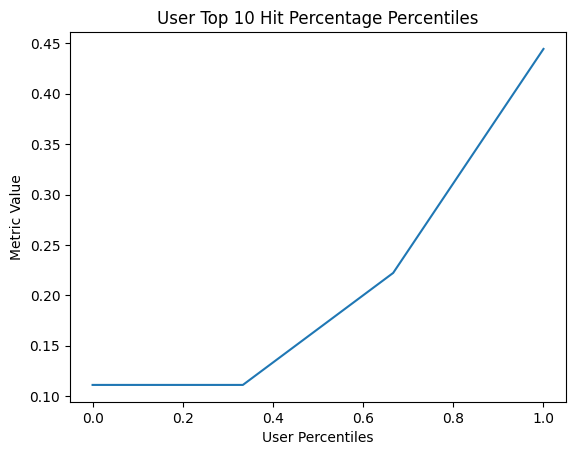

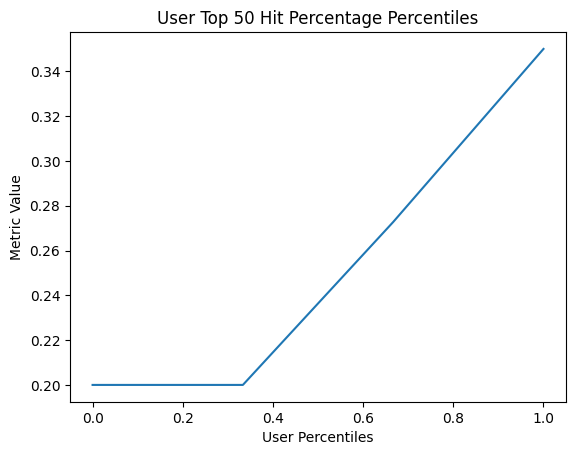

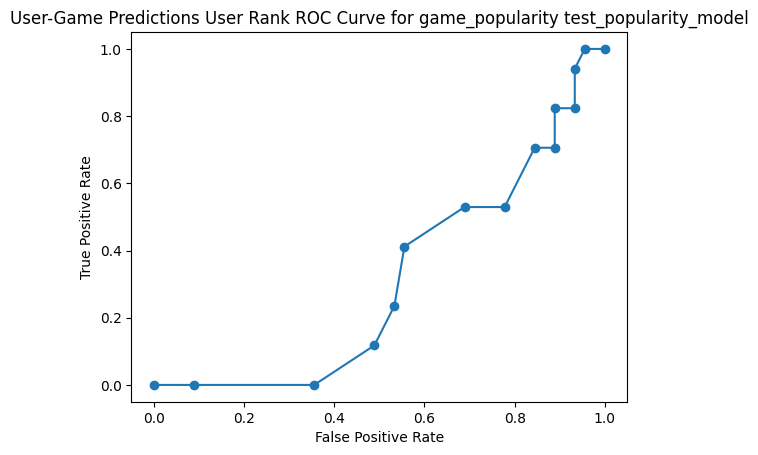

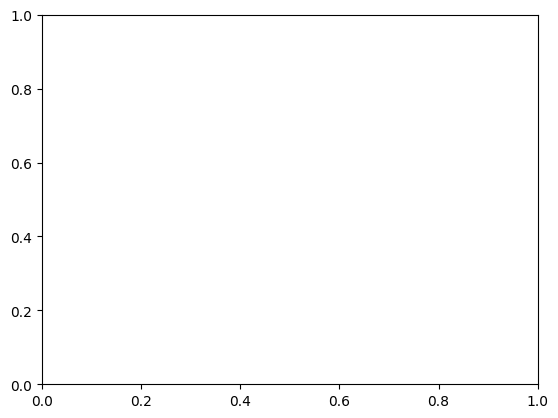

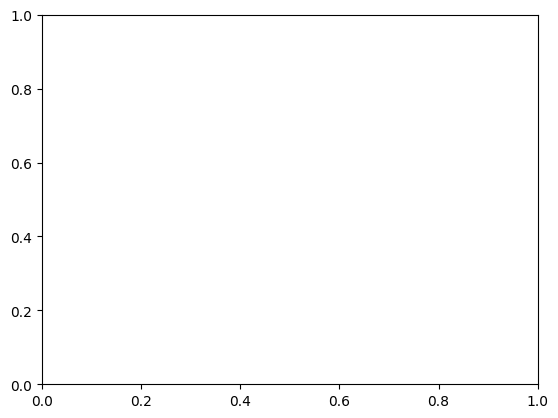

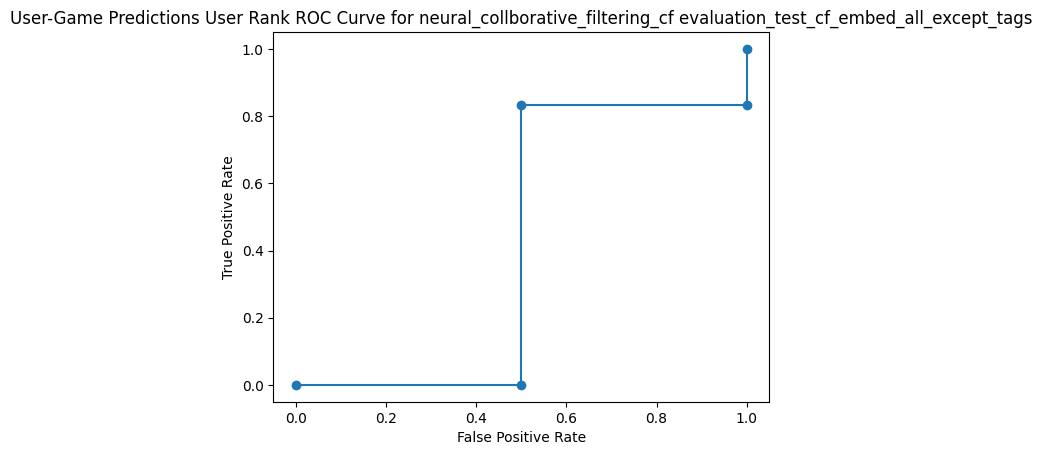

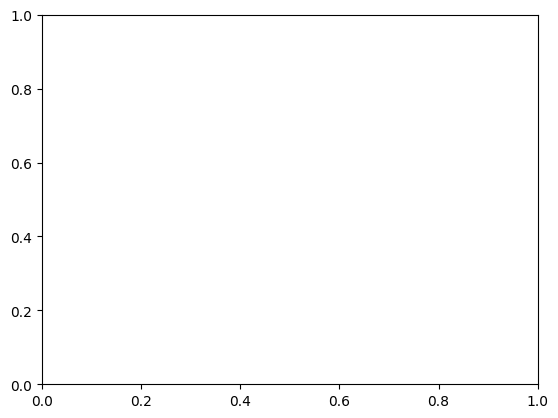

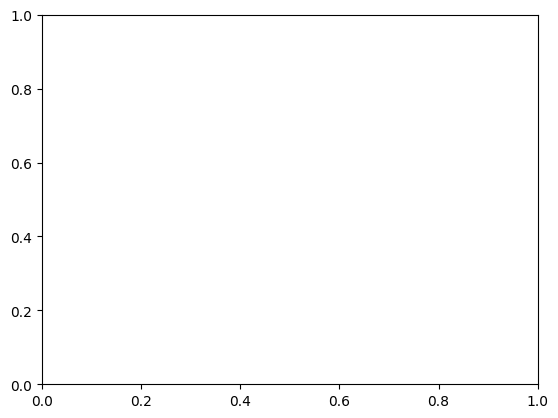

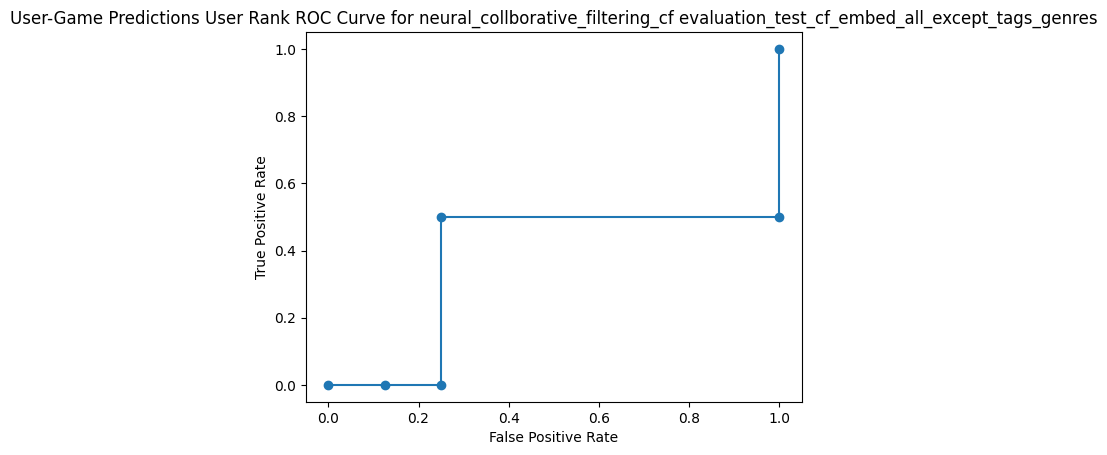

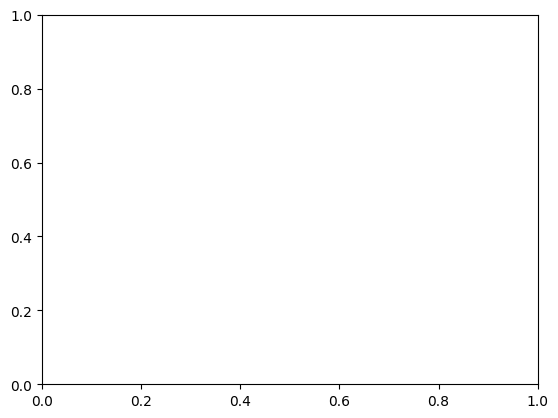

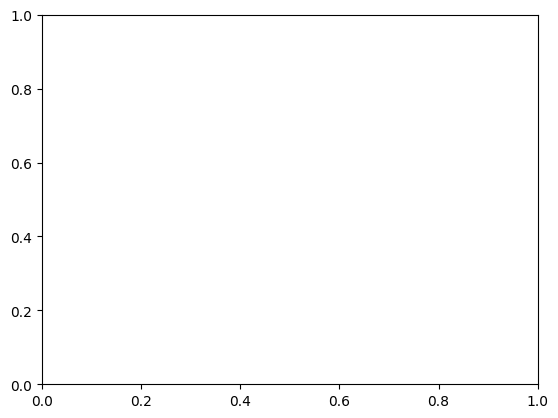

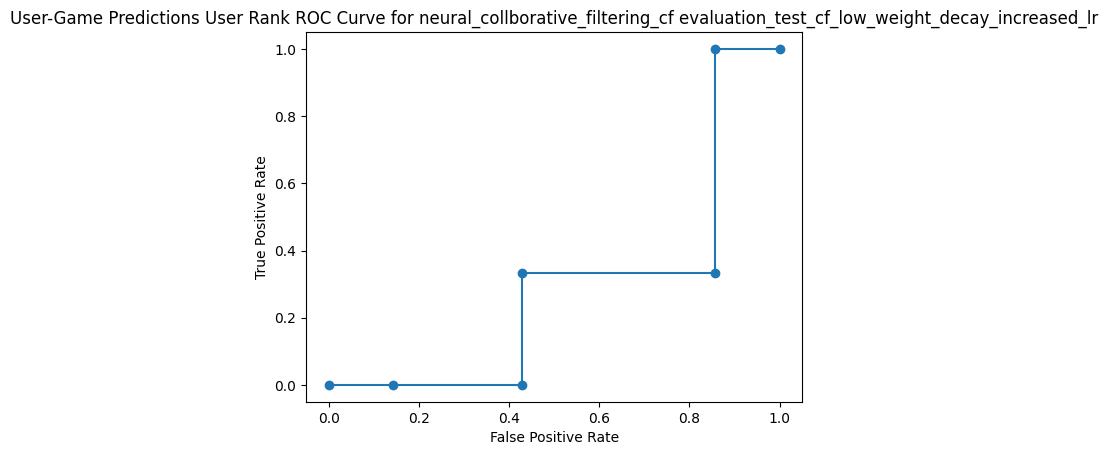

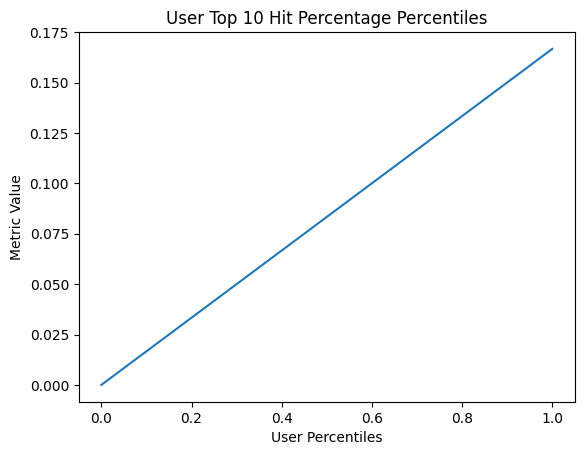

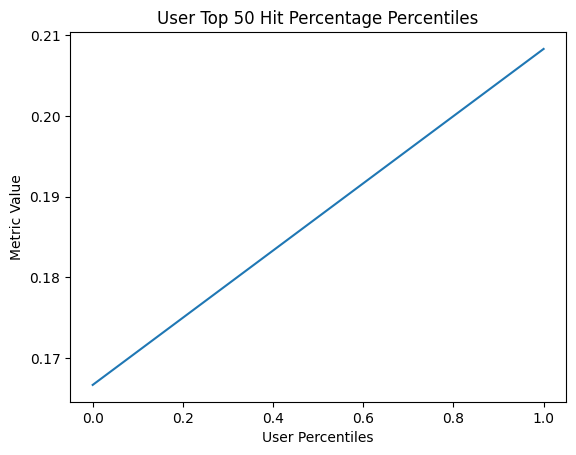

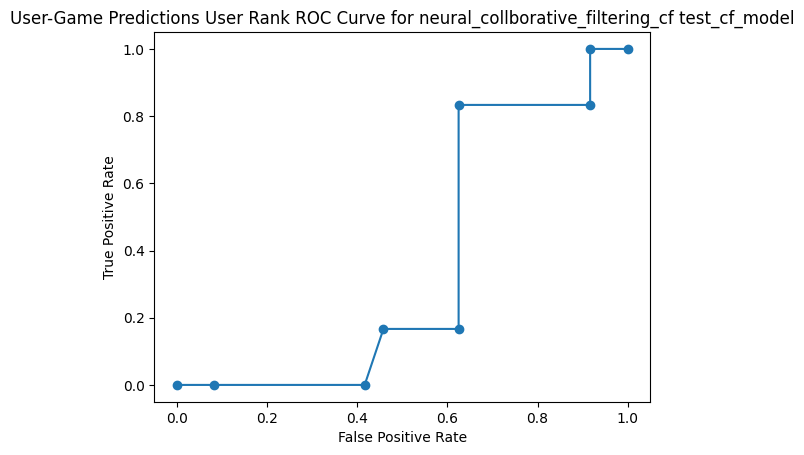

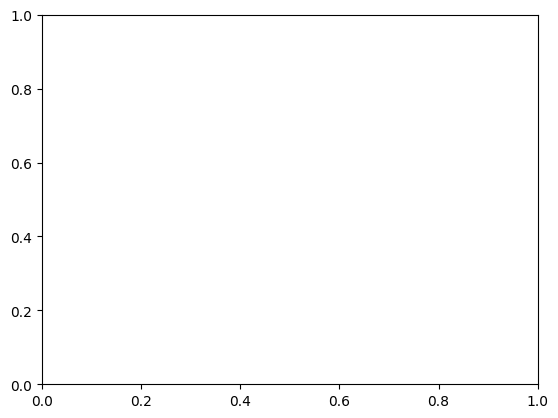

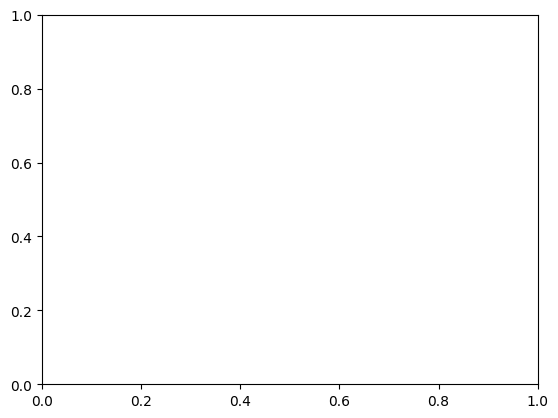

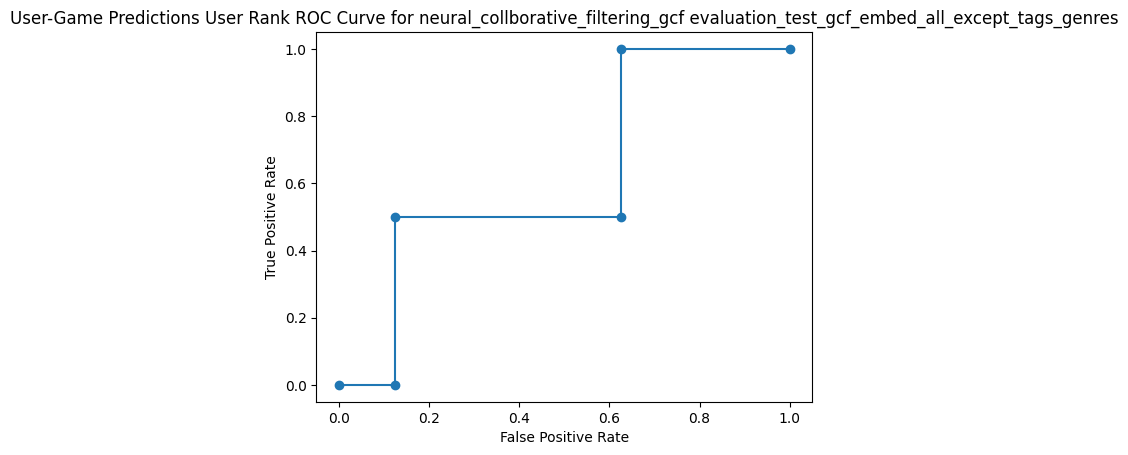

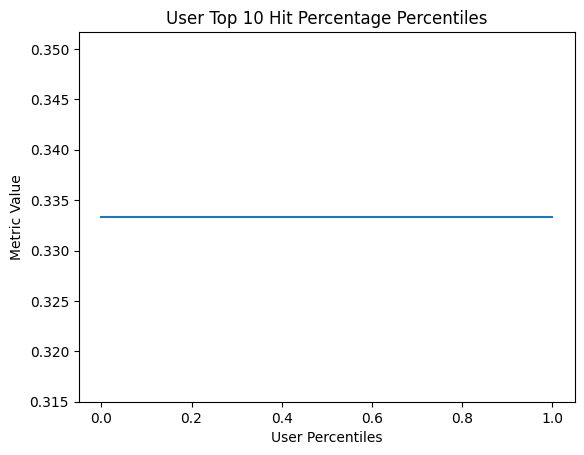

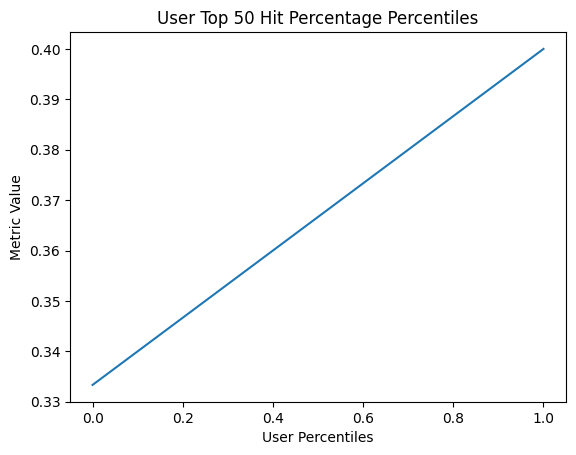

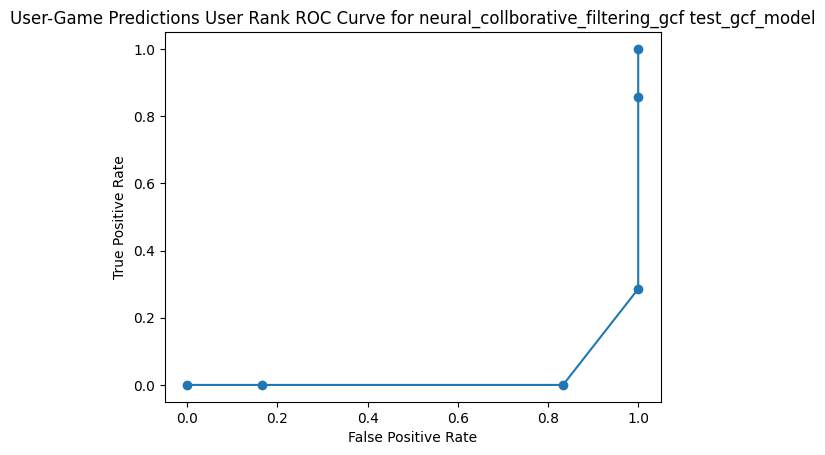

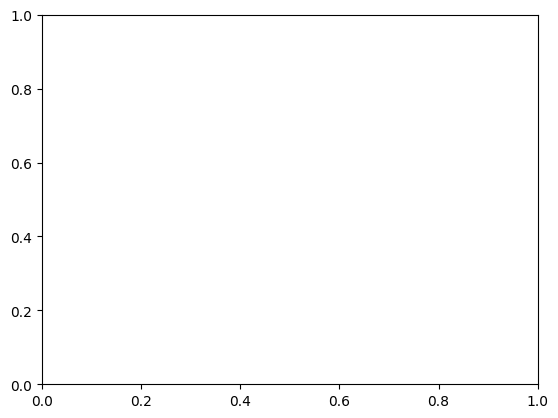

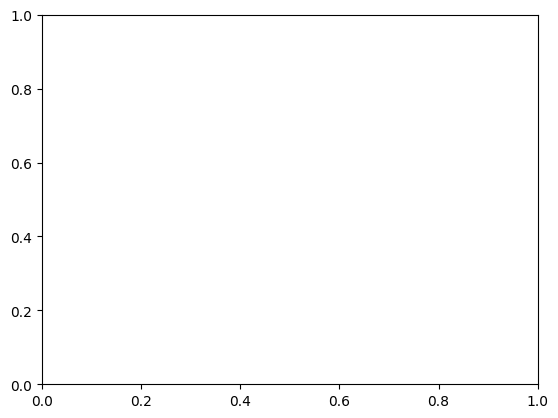

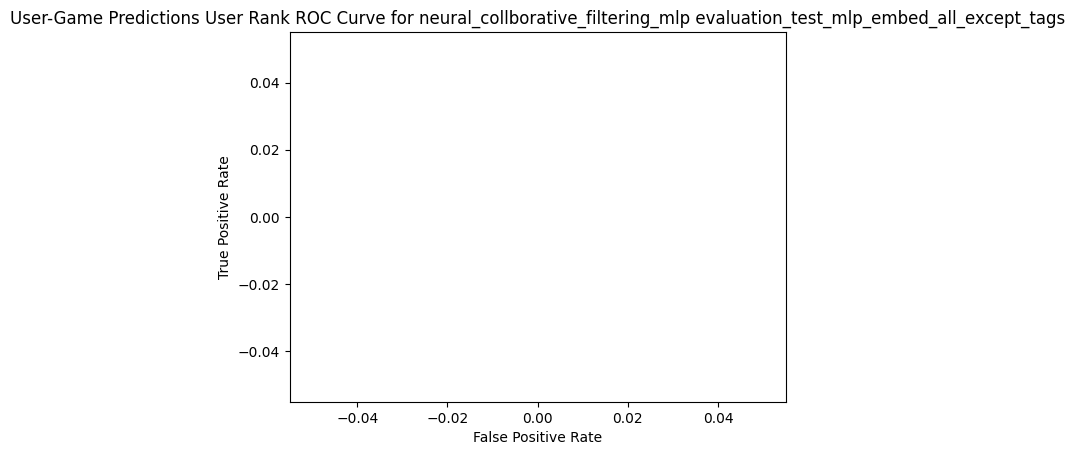

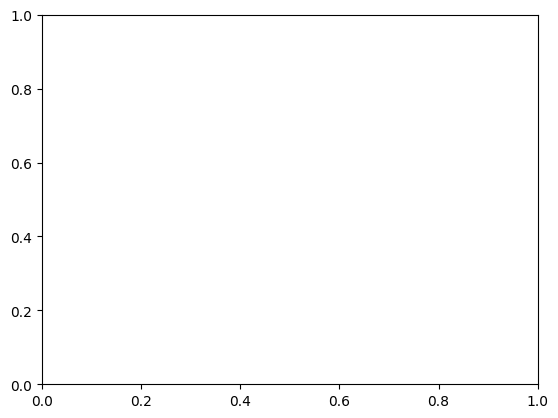

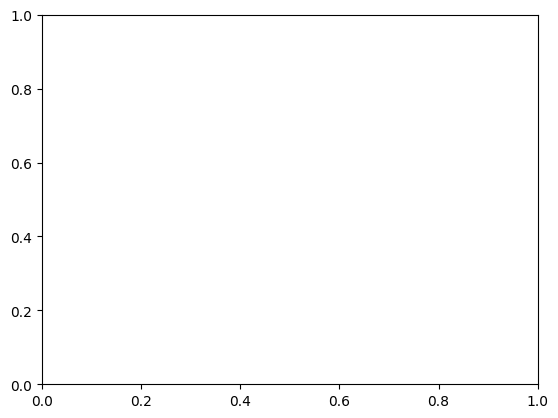

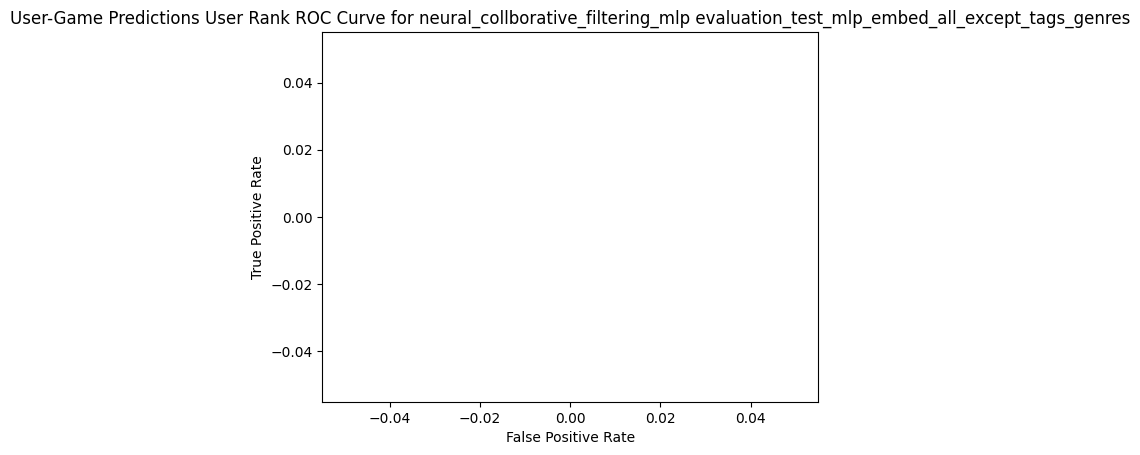

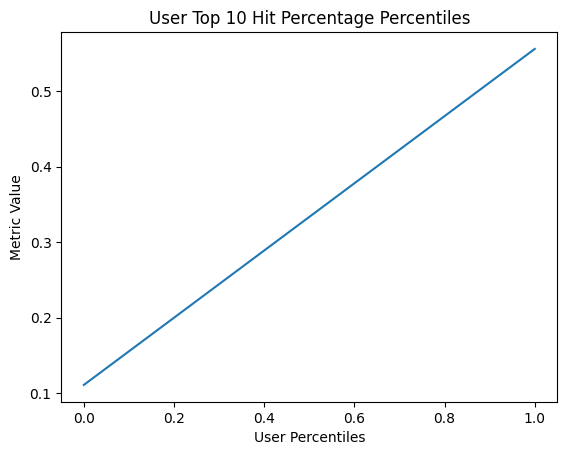

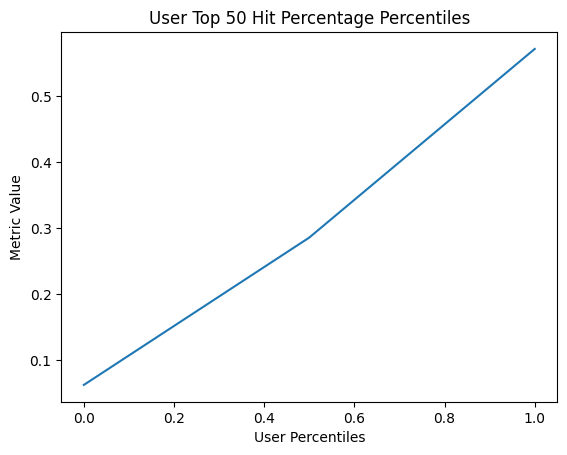

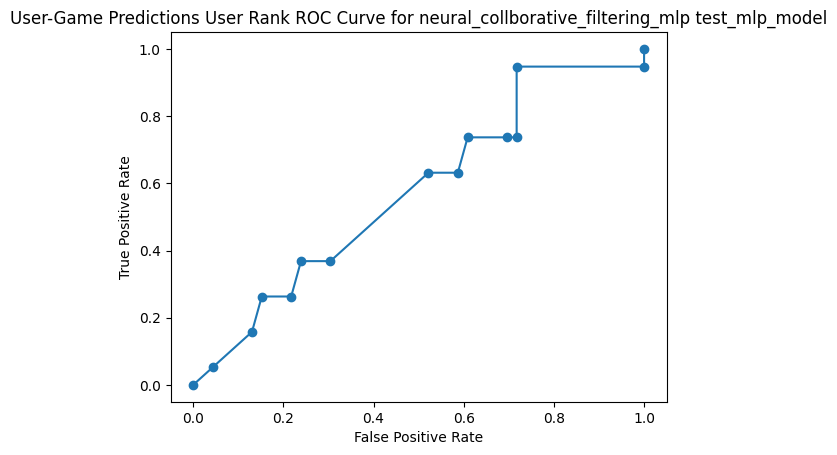

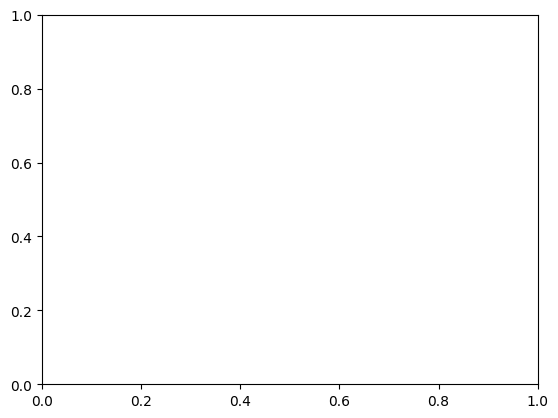

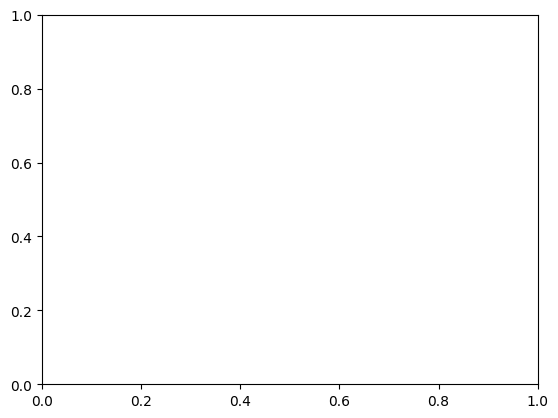

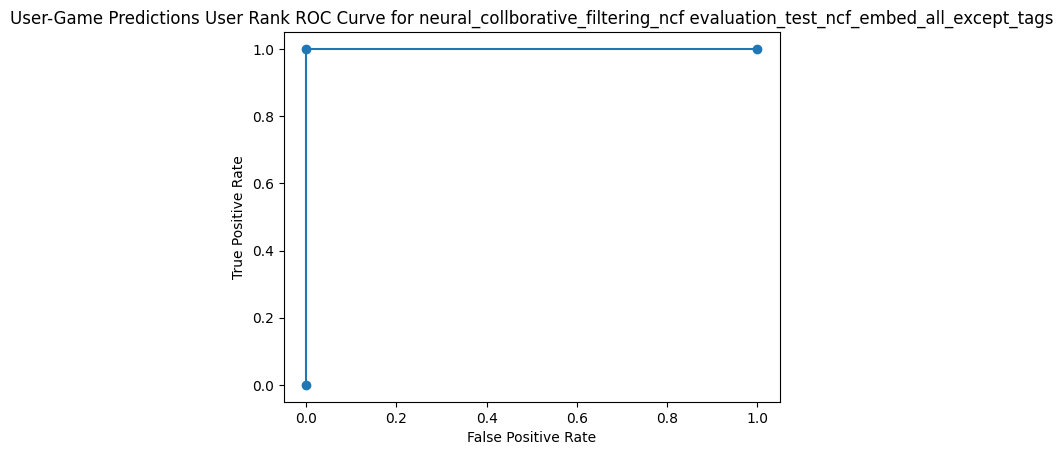

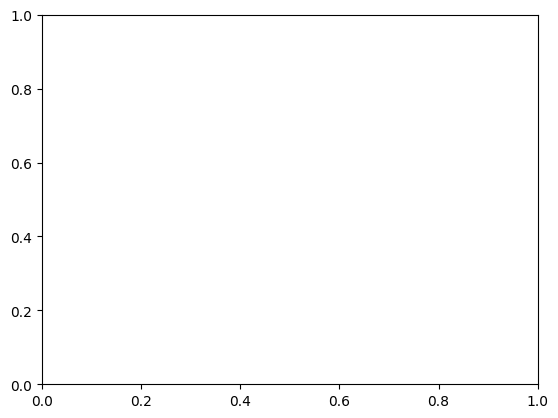

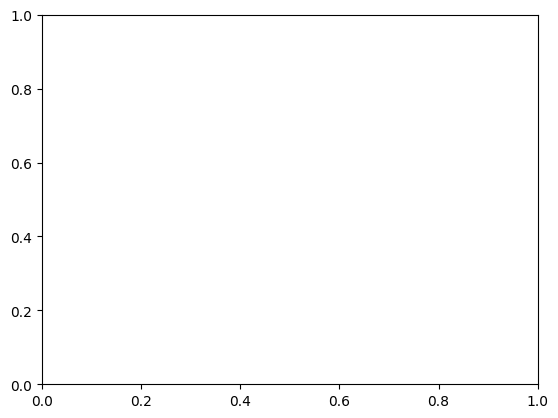

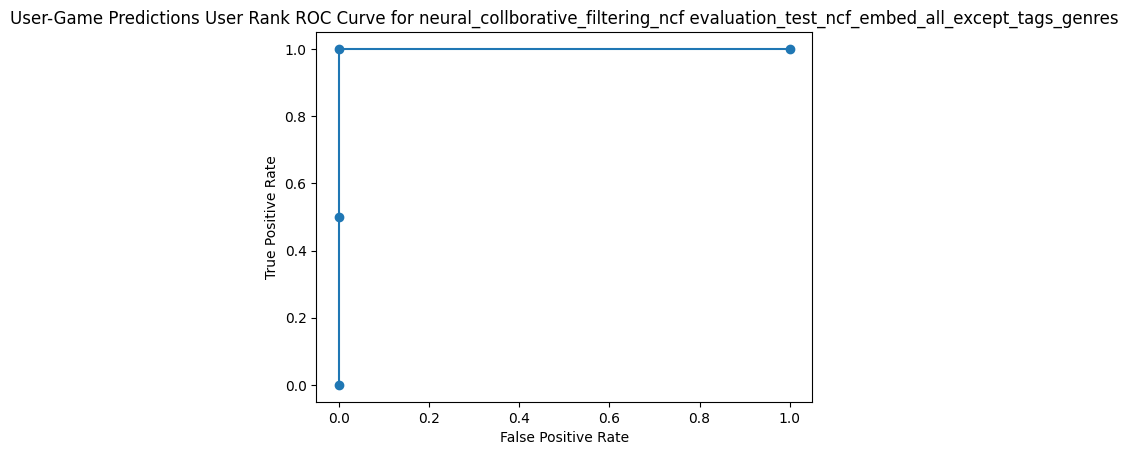

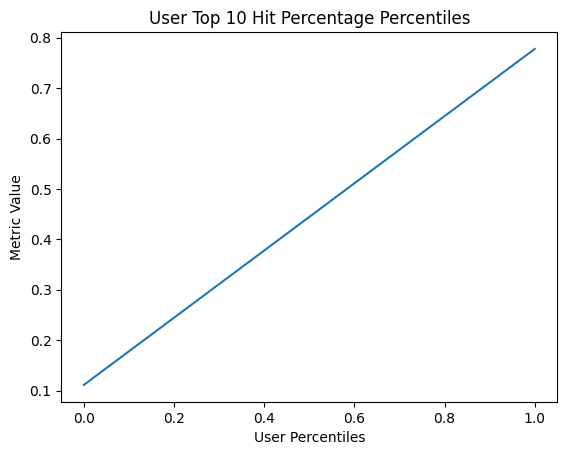

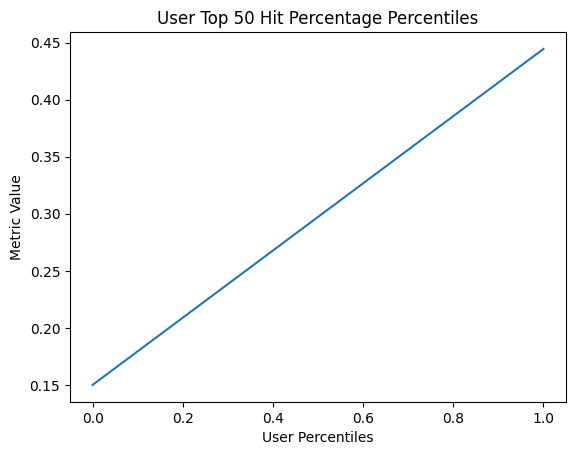

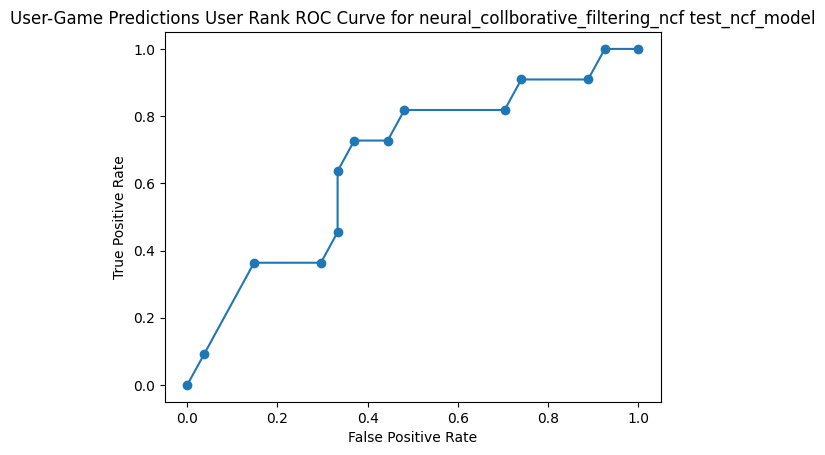

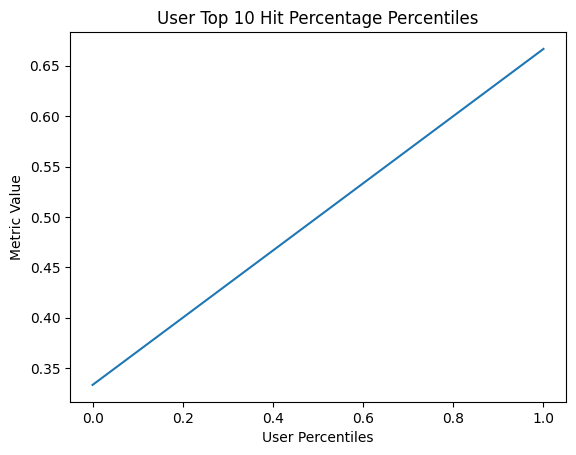

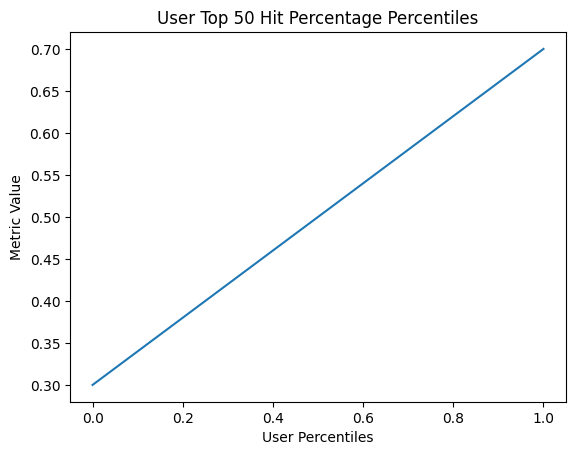

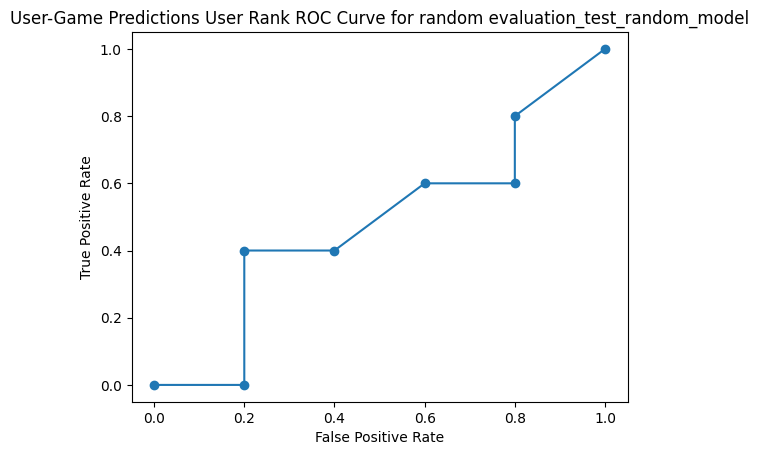

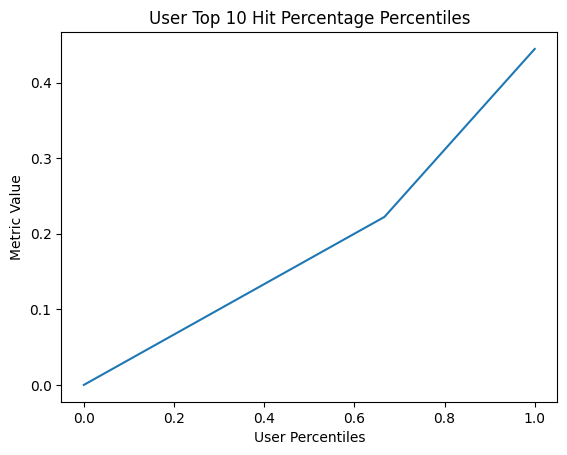

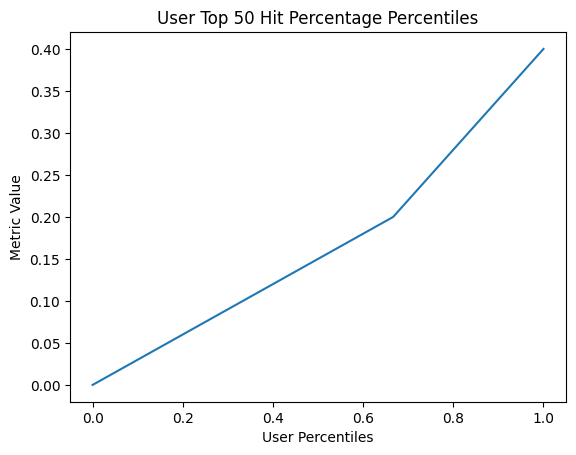

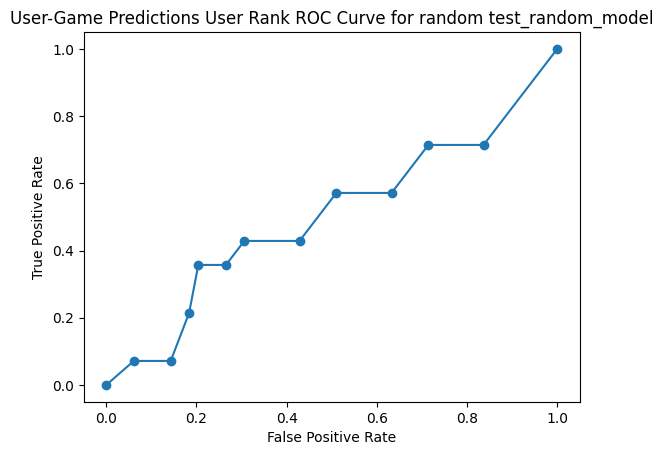

In [26]:
groups = evaluator.all_results.groupby(by=["rec_model_name", "rec_model_save_path"])
for (model_name, model_save_path), data in groups:
    print(model_name, model_save_path)
    run_eval(model_name, model_save_path)

In [ ]:
df = pd.DataFrame(all_metrics)
def display_ranked_column(column_name):
    display(df.sort_values(by=column_name, ascending=False)[['model_name', 'model_save_path', column_name]])
display_ranked_column('top_10_hit_percentage')
display_ranked_column('top_50_hit_percentage')
display_ranked_column('user_rank_auc_roc')

,model_name,model_save_path,top_10_hit_percentage
7,neural_collborative_filtering_cf,evaluation_test_cf_embed_all_except_tags,0.750000
0,common_neighbors,evaluation_test_common_neighbors,0.611111
19,random,evaluation_test_random_model,0.500000
2,common_neighbors,evaluation_test_common_neighbors_percentile_sc...,0.444444
18,neural_collborative_filtering_ncf,test_ncf_model,0.444444
4,common_neighbors,test_common_neighbors_playtime_scored_gaussian...,0.416667
3,common_neighbors,test_common_neighbors_default,0.411765
1,common_neighbors,evaluation_test_common_neighbors_constant_scoring,0.388889
15,neural_collborative_filtering_mlp,test_mlp_model,0.333333
5,game_popularity,evaluation_test_popularity_model,0.333333


,model_name,model_save_path,top_50_hit_percentage
7,neural_collborative_filtering_cf,evaluation_test_cf_embed_all_except_tags,0.750000
3,common_neighbors,test_common_neighbors_default,0.552239
0,common_neighbors,evaluation_test_common_neighbors,0.512195
19,random,evaluation_test_random_model,0.500000
2,common_neighbors,evaluation_test_common_neighbors_percentile_sc...,0.466667
4,common_neighbors,test_common_neighbors_playtime_scored_gaussian...,0.385714
12,neural_collborative_filtering_gcf,test_gcf_model,0.368421
1,common_neighbors,evaluation_test_common_neighbors_constant_scoring,0.363636
5,game_popularity,evaluation_test_popularity_model,0.300000
9,neural_collborative_filtering_cf,evaluation_test_cf_low_weight_decay_increased_lr,0.300000


,model_name,model_save_path,user_rank_auc_roc
17,neural_collborative_filtering_ncf,evaluation_test_ncf_embed_all_except_tags_genres,1.000000
16,neural_collborative_filtering_ncf,evaluation_test_ncf_embed_all_except_tags,1.000000
1,common_neighbors,evaluation_test_common_neighbors_constant_scoring,0.763393
18,neural_collborative_filtering_ncf,test_ncf_model,0.661616
11,neural_collborative_filtering_gcf,evaluation_test_gcf_embed_all_except_tags_genres,0.625000
5,game_popularity,evaluation_test_popularity_model,0.576720
15,neural_collborative_filtering_mlp,test_mlp_model,0.575515
0,common_neighbors,evaluation_test_common_neighbors,0.573810
4,common_neighbors,test_common_neighbors_playtime_scored_gaussian...,0.552110
20,random,test_random_model,0.500729
